In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
tf.random.set_seed(42)
np.random.seed(42)
tf.config.experimental.enable_op_determinism()

In [70]:
# Membaca file Excel yang akan digunakan
file_path = '/content/Harga Close Saham ANTAM.xlsx'
df = pd.read_excel(file_path)

# Menampilkan data frame
print(df)

          Date  Close
0   2018-01-01    655
1   2018-01-08    665
2   2018-01-15    760
3   2018-01-22    855
4   2018-01-29    905
..         ...    ...
300 2023-10-02   1715
301 2023-10-09   1755
302 2023-10-16   1825
303 2023-10-23   1725
304 2023-10-30   1705

[305 rows x 2 columns]


In [71]:
df.head()

,Date,Close
0,2018-01-01,655
1,2018-01-08,665
2,2018-01-15,760
3,2018-01-22,855
4,2018-01-29,905


In [72]:
## Import library yang dibutuhkan untuk LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
tf.random.set_seed(42)
np.random.seed(42)

In [73]:
# Mengambil kolom 'Close' sebagai data yang akan diprediksi
tf.random.set_seed(42)
np.random.seed(42)
time_series_data = df['Close'].values.reshape(-1, 1)

In [74]:
# Normalisasi data ke rentang 0-1
tf.random.set_seed(42)
np.random.seed(42)
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

In [75]:
# Membagi dataset menjadi data latih dan data uji
tf.random.set_seed(42)
np.random.seed(42)
train_size = 244
test_size = len(time_series_data) - train_size

train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

In [76]:
# Fungsi untuk membuat dataset dengan sekuens deret waktu
tf.random.set_seed(42)
np.random.seed(42)
def create_sequences(df, seq_length):
    sequences = []
    for i in range(len(df) - seq_length):
        sequences.append(df[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 2

# Membuat dataset dengan sekuens deret waktu
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)
X_train

array([[[0.10233066],
        [0.10597232]],

       [[0.10597232],
        [0.1405681 ]],

       [[0.1405681 ],
        [0.17516387]],

       [[0.17516387],
        [0.19337218]],

       [[0.19337218],
        [0.16605972]],

       [[0.16605972],
        [0.19519301]],

       [[0.19519301],
        [0.18973052]],

       [[0.18973052],
        [0.19883467]],

       [[0.19883467],
        [0.17334304]],

       [[0.17334304],
        [0.17152221]],

       [[0.17152221],
        [0.15149308]],

       [[0.15149308],
        [0.14603059]],

       [[0.14603059],
        [0.15695557]],

       [[0.15695557],
        [0.18426803]],

       [[0.18426803],
        [0.18608886]],

       [[0.18608886],
        [0.17698471]],

       [[0.17698471],
        [0.16605972]],

       [[0.16605972],
        [0.1587764 ]],

       [[0.1587764 ],
        [0.17334304]],

       [[0.17334304],
        [0.18062637]],

       [[0.18062637],
        [0.17880554]],

       [[0.17880554],
        [0.1

In [77]:
# Memisahkan fitur dan target
tf.random.set_seed(42)
np.random.seed(42)
y_train = X_train[:, -1]
X_train = X_train[:, :-1]
y_test = X_test[:, -1]
X_test = X_test[:, :-1]

In [78]:
# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
tf.random.set_seed(42)
np.random.seed(42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [79]:
# Membangun model LSTM
tf.random.set_seed(42)
np.random.seed(42)
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Melatih model dengan epoch 50 dan batch size 32
history1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=5)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


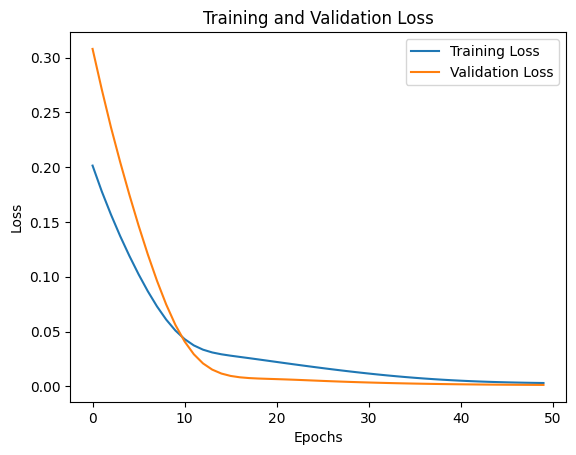

In [80]:
# Plot loss pada setiap epoch
tf.random.set_seed(42)
np.random.seed(42)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
# Membuat prediksi dengan model LSTM
tf.random.set_seed(42)
np.random.seed(42)
predicted1 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [82]:
# Invers transform hasil prediksi ke skala aslinya
tf.random.set_seed(42)
np.random.seed(42)
predictLSTM1 = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted1.reshape(-1, 1)), axis=1))[:, 1]

In [83]:
predictLSTM1

array([1906.58200467, 1969.42951965, 1969.42951965, 1872.99913692,
       1868.21640861, 1759.22581959, 1740.46947509, 1773.33176649,
       1849.12166739, 2047.63623607, 1892.16736794, 1882.57588708,
       1969.42951965, 1868.21640861, 1950.02527022, 1930.68027091,
       1916.21031225, 1916.21031225, 2077.20744538, 2247.29587054,
       2227.0632652 , 2257.43451476, 2146.72534502, 2018.19793034,
       1930.68027091, 1925.85335052, 1815.84765315, 1830.0860126 ,
       1830.0860126 , 2018.19793034, 2027.99596822, 2037.80857313,
       2027.99596822, 2027.99596822, 1969.42951965, 1930.68027091,
       1887.36974525, 1853.88982868, 1830.0860126 , 1906.58200467,
       1988.89269185, 1940.34540522, 1882.57588708, 1906.58200467,
       1930.68027091, 1906.58200467, 1892.16736794, 1950.02527022,
       1921.02986729, 1882.57588708, 1921.02986729, 1887.36974525,
       1877.78562975, 1834.83960688, 1787.4707756 , 1754.53131175,
       1661.40846038, 1698.48184741, 1763.92425561])

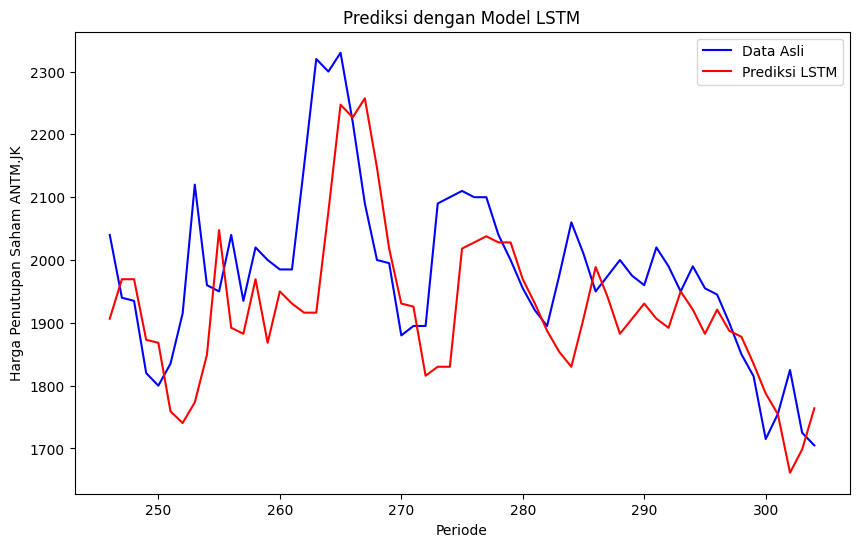

In [84]:
# Plot hasil prediksi
tf.random.set_seed(42)
np.random.seed(42)
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + seq_length:], df['Close'].values[train_size + seq_length:], label='Data Asli', color='blue')
plt.plot(df.index[train_size + seq_length:], predictLSTM1, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Periode')
plt.ylabel('Harga Penutupan Saham ANTM.JK')
plt.legend()
plt.show()

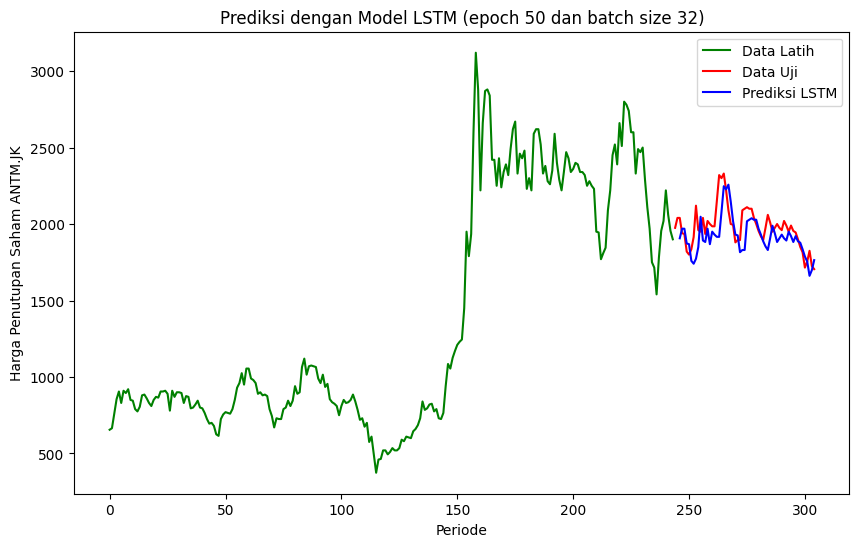

In [85]:
# Plot data latih dan data uji beserta prediksi
tf.random.set_seed(42)
np.random.seed(42)
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], df['Close'].values[:train_size], label='Data Latih', color='green')
plt.plot(df.index[train_size:], df['Close'].values[train_size:], label='Data Uji', color='red')
plt.plot(df.index[train_size + seq_length:], predictLSTM1, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM (epoch 50 dan batch size 32)')
plt.xlabel('Periode')
plt.ylabel('Harga Penutupan Saham ANTM.JK')
plt.legend()
plt.show()

In [86]:
# Menghitung MAPE untuk model LSTM
tf.random.set_seed(42)
np.random.seed(42)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))/61*10000

# Mengambil nilai aktual dari data uji (setelah invers transformasi)
actual_values_test =  df['Close'].values[train_size + seq_length:]
predicted_values_test = predictLSTM1

# Menghitung MAPE untuk model LSTM
mape_lstm = calculate_mape(actual_values_test, predicted_values_test)
print(f'MAPE untuk prediksi model LSTM dengan epoch 50 dan batch size 32: {mape_lstm:.5f}%')

MAPE untuk prediksi model LSTM dengan epoch 50 dan batch size 32: 7.34447%


In [87]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Melatih model dengan epoch 50 dan batch size 64
history2 = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=5)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


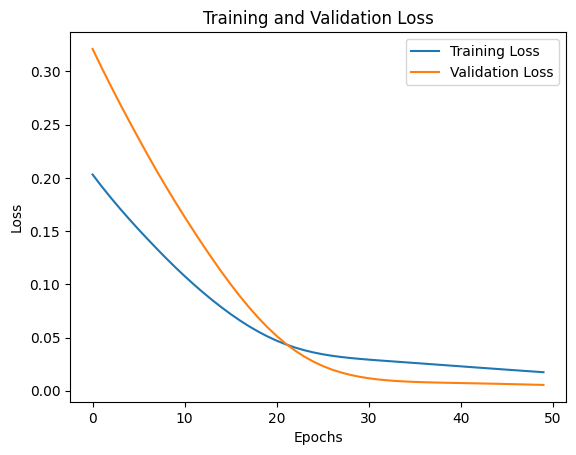

In [88]:
# Plot loss pada setiap epoch
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [89]:
# Membuat prediksi dengan model LSTM
predicted2 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [90]:
# Invers transform hasil prediksi ke skala aslinya
predictLSTM2 = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted2.reshape(-1, 1)), axis=1))[:, 1]

In [91]:
predictLSTM2

array([1789.13698053, 1827.50355864, 1827.50355864, 1768.5935576 ,
       1765.66542339, 1698.76917773, 1687.22358876, 1707.44555527,
       1753.96892667, 1875.10562587, 1780.32295287, 1774.45489991,
       1827.50355864, 1765.66542339, 1815.66875708, 1803.86047077,
       1795.02140093, 1795.02140093, 1893.06528544, 1995.96047783,
       1983.75593591, 2002.07273293, 1935.20259333, 1857.20538008,
       1803.86047077, 1800.91269565, 1733.5632357 , 1742.29861784,
       1742.29861784, 1857.20538008, 1863.1655817 , 1869.1323303 ,
       1863.1655817 , 1863.1655817 , 1827.50355864, 1803.86047077,
       1777.38810802, 1756.8905139 , 1742.29861784, 1789.13698053,
       1839.36438441, 1809.7612586 , 1774.45489991, 1789.13698053,
       1803.86047077, 1789.13698053, 1780.32295287, 1815.66875708,
       1797.96622992, 1774.45489991, 1797.96622992, 1777.38810802,
       1771.52349222, 1745.21382177, 1716.13658166, 1695.88032538,
       1638.44691253, 1661.34184492, 1701.659585  ])

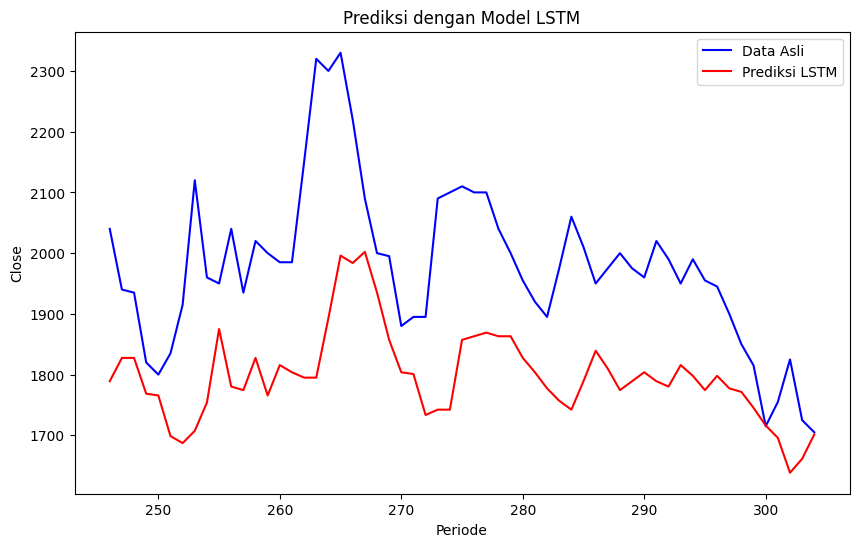

In [92]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + seq_length:], df['Close'].values[train_size + seq_length:], label='Data Asli', color='blue')
plt.plot(df.index[train_size + seq_length:], predictLSTM2, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Periode')
plt.ylabel('Close')
plt.legend()
plt.show()

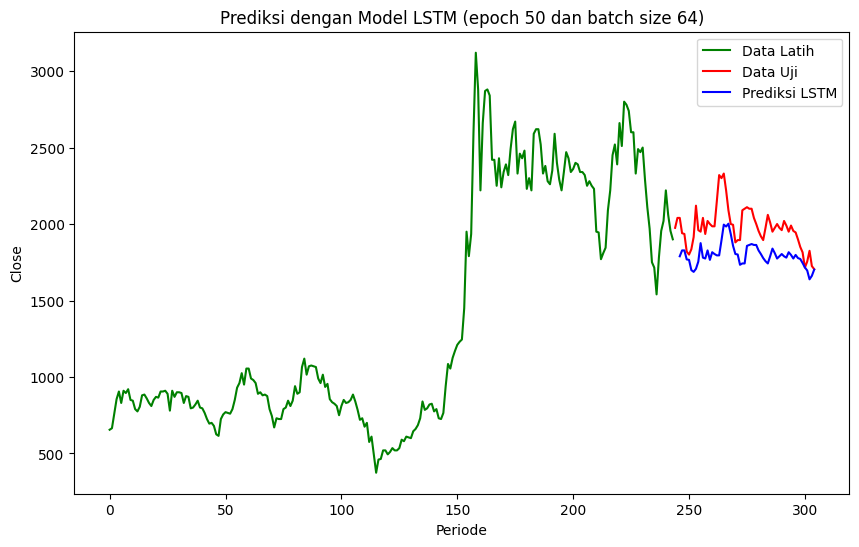

In [93]:
# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], df['Close'].values[:train_size], label='Data Latih', color='green')
plt.plot(df.index[train_size:], df['Close'].values[train_size:], label='Data Uji', color='red')
plt.plot(df.index[train_size + seq_length:], predictLSTM2, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM (epoch 50 dan batch size 64)')
plt.xlabel('Periode')
plt.ylabel('Close')
plt.legend()
plt.show()

In [94]:
# Menghitung MAPE untuk model LSTM
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))/61*10000

# Mengambil nilai aktual dari data uji (setelah invers transformasi)
actual_values_test =  df['Close'].values[train_size + seq_length:]
predicted_values_test = predictLSTM2


# Menghitung MAPE untuk model LSTM
mape_lstm = calculate_mape(actual_values_test, predicted_values_test)
print(f'MAPE untuk prediksi model LSTM: {mape_lstm:.5f}%')

MAPE untuk prediksi model LSTM: 14.58407%


In [95]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Melatih model dengan epoch 100 dan batch size 32
history3 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=5)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

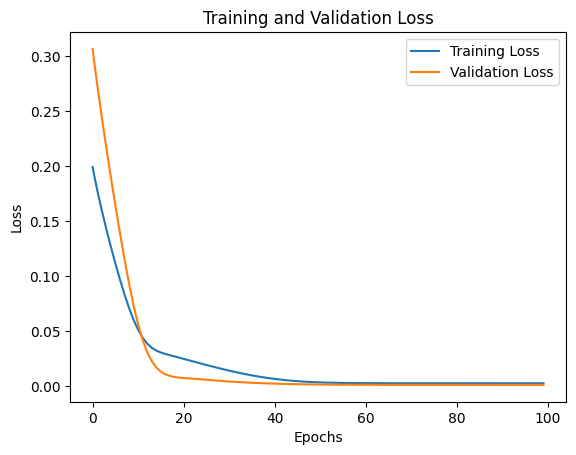

In [96]:
# Plot loss pada setiap epoch
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
# Membuat prediksi dengan model LSTM
predicted3 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [98]:
# Invers transform hasil prediksi ke skala aslinya
predictLSTM3 = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted3.reshape(-1, 1)), axis=1))[:, 1]

In [99]:
predictLSTM3

array([1925.70211542, 1993.26427019, 1993.26427019, 1889.60422754,
       1884.46337974, 1767.33359241, 1747.17987812, 1782.49114704,
       1863.9404161 , 2077.35147882, 1910.20771897, 1899.89787138,
       1993.26427019, 1884.46337974, 1972.40348268, 1951.60701919,
       1936.05206323, 1936.05206323, 2109.15029609, 2292.08944952,
       2270.32468855, 2302.99605381, 2183.91281307, 2045.69816804,
       1951.60701919, 1946.41805112, 1828.17986107, 1843.48177648,
       1843.48177648, 2045.69816804, 2056.23306787, 2066.78417146,
       2056.23306787, 2056.23306787, 1993.26427019, 1951.60701919,
       1905.05083108, 1869.06522381, 1843.48177648, 1925.70211542,
       2014.18954539, 1961.99723089, 1899.89787138, 1925.70211542,
       1951.60701919, 1925.70211542, 1910.20771897, 1972.40348268,
       1941.23301125, 1899.89787138, 1941.23301125, 1905.05083108,
       1894.74900353, 1848.5905441 , 1797.68438268, 1762.28914881,
       1662.24049896, 1702.06795251, 1772.38196421])

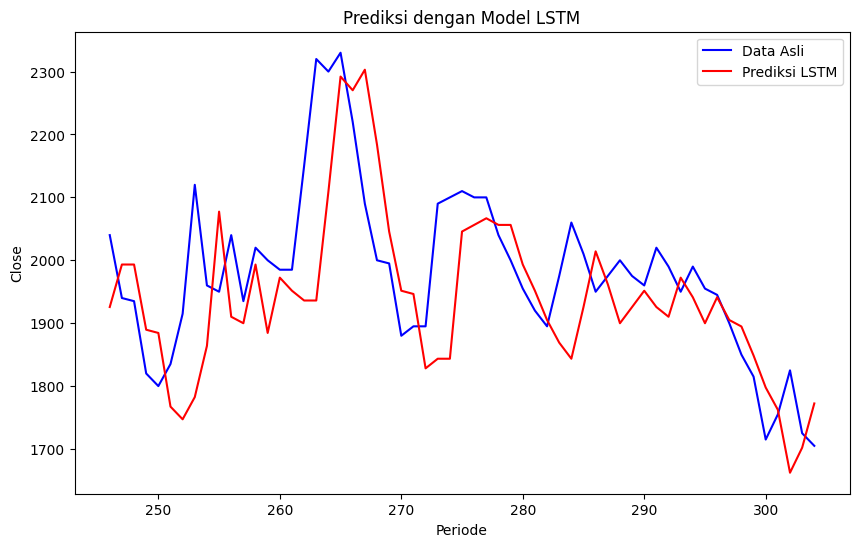

In [100]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + seq_length:], df['Close'].values[train_size + seq_length:], label='Data Asli', color='blue')
plt.plot(df.index[train_size + seq_length:], predictLSTM3, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Periode')
plt.ylabel('Close')
plt.legend()
plt.show()

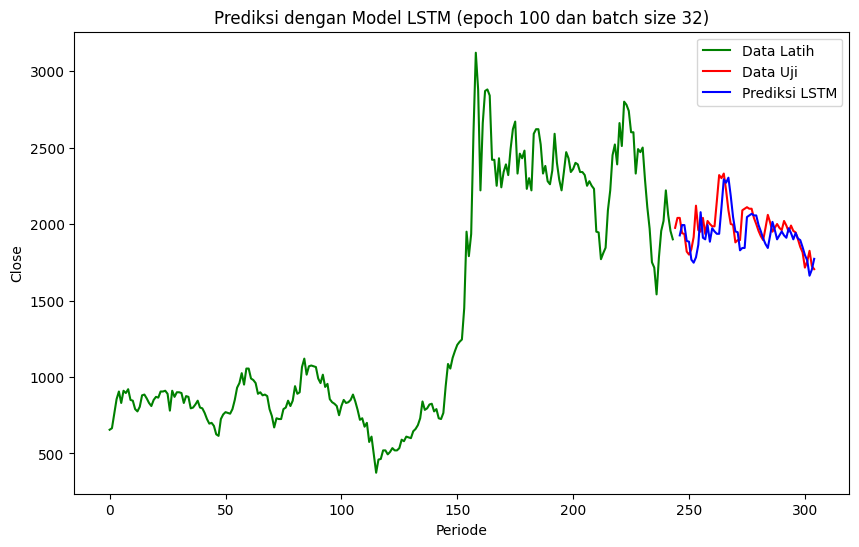

In [101]:
# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], df['Close'].values[:train_size], label='Data Latih', color='green')
plt.plot(df.index[train_size:], df['Close'].values[train_size:], label='Data Uji', color='red')
plt.plot(df.index[train_size + seq_length:], predictLSTM3, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM (epoch 100 dan batch size 32)')
plt.xlabel('Periode')
plt.ylabel('Close')
plt.legend()
plt.show()

In [102]:
# Menghitung MAPE untuk model LSTM
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))/61*10000

# Mengambil nilai aktual dari data uji (setelah invers transformasi)
actual_values_test =  df['Close'].values[train_size + seq_length:]
predicted_values_test = predictLSTM3


# Menghitung MAPE untuk model LSTM
mape_lstm = calculate_mape(actual_values_test, predicted_values_test)
print(f'MAPE untuk prediksi model LSTM: {mape_lstm:.5f}%')

MAPE untuk prediksi model LSTM: 7.15798%


In [103]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Melatih model dengan epoch 100 dan batch size 64
history4 = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=5)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

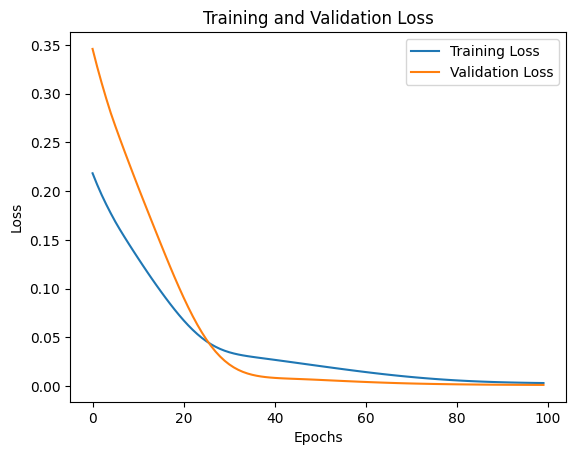

In [104]:
# Plot loss pada setiap epoch
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
# Membuat prediksi dengan model LSTM
predicted4 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [106]:
# Invers transform hasil prediksi ke skala aslinya
predictLSTM4 = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted4.reshape(-1, 1)), axis=1))[:, 1]

In [107]:
predictLSTM4

array([1911.52431548, 1975.23799515, 1975.23799515, 1877.49690819,
       1872.65165627, 1762.31828284, 1743.34539717, 1776.58970451,
       1853.31156719, 2054.58388507, 1896.9171977 , 1887.1990329 ,
       1975.23799515, 1872.65165627, 1955.56188262, 1935.94943941,
       1921.28241682, 1921.28241682, 2084.60307109, 2257.43762457,
       2236.86359453, 2267.74894524, 2155.20875049, 2024.70905983,
       1935.94943941, 1931.05672193, 1819.62001967, 1834.0353111 ,
       1834.0353111 , 2024.70905983, 2034.6514585 , 2044.60956991,
       2034.6514585 , 2034.6514585 , 1975.23799515, 1935.94943941,
       1892.05606937, 1858.14061534, 1834.0353111 , 1911.52431548,
       1994.97859538, 1945.74764097, 1887.1990329 , 1911.52431548,
       1935.94943941, 1911.52431548, 1896.9171977 , 1955.56188262,
       1926.16727793, 1887.1990329 , 1926.16727793, 1892.05606937,
       1882.34592462, 1838.84831917, 1790.89713454, 1757.5689441 ,
       1663.42263699, 1700.88990635, 1767.0713861 ])

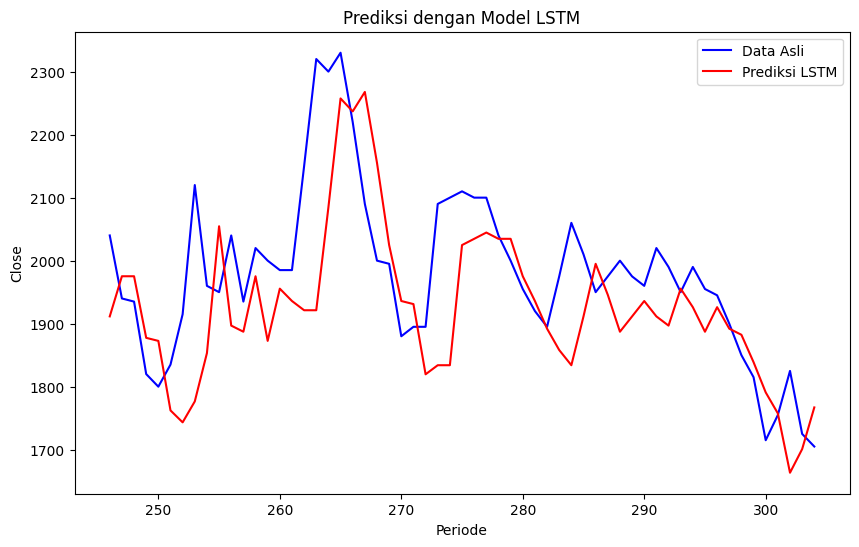

In [108]:
# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + seq_length:], df['Close'].values[train_size + seq_length:], label='Data Asli', color='blue')
plt.plot(df.index[train_size + seq_length:], predictLSTM4, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Periode')
plt.ylabel('Close')
plt.legend()
plt.show()

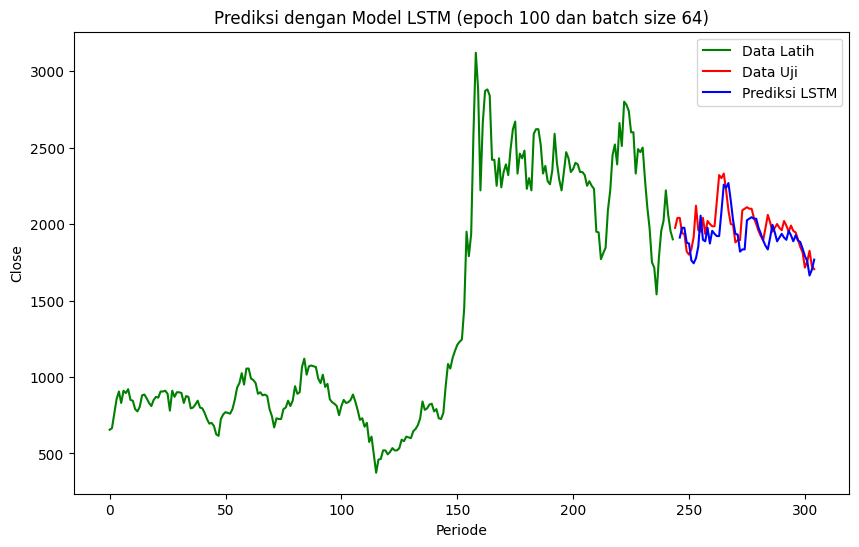

In [109]:
# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], df['Close'].values[:train_size], label='Data Latih', color='green')
plt.plot(df.index[train_size:], df['Close'].values[train_size:], label='Data Uji', color='red')
plt.plot(df.index[train_size + seq_length:], predictLSTM4, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM (epoch 100 dan batch size 64)')
plt.xlabel('Periode')
plt.ylabel('Close')
plt.legend()
plt.show()

In [110]:
# Menghitung MAPE untuk model LSTM
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))/61*10000

# Mengambil nilai aktual dari data uji (setelah invers transformasi)
actual_values_test =  df['Close'].values[train_size + seq_length:]
predicted_values_test = predictLSTM4

# Menghitung MAPE untuk model LSTM
mape_lstm = calculate_mape(actual_values_test, predicted_values_test)
print(f'MAPE untuk prediksi model LSTM: {mape_lstm:.5f}%')

MAPE untuk prediksi model LSTM: 7.26061%


In [111]:
actual_values_test

array([2040, 1940, 1935, 1820, 1800, 1835, 1915, 2120, 1960, 1950, 2040,
       1935, 2020, 2000, 1985, 1985, 2150, 2320, 2300, 2330, 2220, 2090,
       2000, 1995, 1880, 1895, 1895, 2090, 2100, 2110, 2100, 2100, 2040,
       2000, 1955, 1920, 1895, 1975, 2060, 2010, 1950, 1975, 2000, 1975,
       1960, 2020, 1990, 1950, 1990, 1955, 1945, 1900, 1850, 1815, 1715,
       1755, 1825, 1725, 1705])